In [2]:
pip install gspread pandas oauth2client

In [3]:
import pandas as pd
# Dataset criado atraves da revista imobiliaria de junho de 2013
# Link direto para o CSV exportado da planilha pública
url = "https://drive.google.com/uc?export=download&id=1rJoAuu1u_2DfDx9EFTSUcRgK5bm8vEC-"
df = pd.read_csv(url)

print(df.head())


   FORMA                    MODELO VALOR (Em Reais)            BAIRRO  \
0  Venda  apartamento 1 dormitório       130.000,00  Jardim São Dimas   
1  Venda  apartamento 1 dormitório       148.000,00    Jardim Morumbi   
2  Venda  apartamento 1 dormitório       160.000,00  Jardim São Dimas   
3  Venda  apartamento 1 dormitório       160.000,00            Centro   
4  Venda  apartamento 1 dormitório       160.000,00  Jardim São Dimas   

    REGIÃO IMOBILIARIA  
0  Central   Executiva  
1      Sul      Brasil  
2  Central      Brasil  
3  Central     Celeste  
4  Central       Terra  


In [4]:
# Link direto para o CSV exportado do Google Drive
# Certifique-se que o arquivo está compartilhado publicamente no Google Drive
url = "https://drive.google.com/uc?export=download&id=1rJoAuu1u_2DfDx9EFTSUcRgK5bm8vEC-"

# Attempt to read the CSV from the URL
# This should work after ensuring the Google Sheet is publicly shared.
try:
    df = pd.read_csv(url)
    print(df.head())
except Exception as e:
    print(f"Erro ao ler o arquivo CSV do Google Drive: {e}")
    print("Por favor, verifique se o arquivo CSV no Google Drive está compartilhado publicamente ('Qualquer pessoa com o link pode ver') e se o ID do arquivo está correto na URL.")

# Continue com o restante das suas análises (limpeza de valor, contagens, etc.)
# usando o DataFrame df carregado desta nova URL.

   FORMA                    MODELO VALOR (Em Reais)            BAIRRO  \
0  Venda  apartamento 1 dormitório       130.000,00  Jardim São Dimas   
1  Venda  apartamento 1 dormitório       148.000,00    Jardim Morumbi   
2  Venda  apartamento 1 dormitório       160.000,00  Jardim São Dimas   
3  Venda  apartamento 1 dormitório       160.000,00            Centro   
4  Venda  apartamento 1 dormitório       160.000,00  Jardim São Dimas   

    REGIÃO IMOBILIARIA  
0  Central   Executiva  
1      Sul      Brasil  
2  Central      Brasil  
3  Central     Celeste  
4  Central       Terra  


In [5]:
# Filtra o DataFrame para incluir apenas as linhas onde a coluna 'Bairro' é 'Desconhecido'
registros_desconhecidos = df[df['IMOBILIARIA'] == 'Celeste']

# Exibe os registros encontrados
print(registros_desconhecidos)

       FORMA                     MODELO VALOR (Em Reais)  \
3      Venda   apartamento 1 dormitório       160.000,00   
9      Venda   apartamento 1 dormitório       185.000,00   
23     Venda  apartamento 2 dormitórios       138.000,00   
64     Venda  apartamento 2 dormitórios       180.000,00   
65     Venda  apartamento 2 dormitórios       180.000,00   
70     Venda  apartamento 2 dormitórios       185.000,00   
84     Venda  apartamento 2 dormitórios       200.000,00   
85     Venda  apartamento 2 dormitórios       210.000,00   
143    Venda  apartamento 2 dormitórios       325.000,00   
147    Venda  apartamento 2 dormitórios       330.000,00   
161    Venda  apartamento 3 dormitórios       130.000,00   
162    Venda  apartamento 3 dormitórios       150.000,00   
174    Venda  apartamento 3 dormitórios       190.000,00   
184    Venda  apartamento 3 dormitórios       230.000,00   
189    Venda  apartamento 3 dormitórios       220.000,00   
212    Venda  apartamento 3 dormitórios 

In [6]:
# Verifica se o DataFrame df existe e não está vazio e se as colunas 'FORMA' e 'MODELO' existem
if 'df' in globals() and not df.empty and 'MODELO' in df.columns and 'FORMA' in df.columns:
    # Cria a tabela cruzada de 'FORMA' e 'MODELO'
    # Isso contará quantas vezes cada combinação de Forma e Modelo aparece
    tabela_forma_modelo = pd.crosstab(df['MODELO'], df['FORMA'])

    # Exibe a tabela cruzada
    print("Tabela Cruzada de FORMA por MODELO:")
    print(tabela_forma_modelo)

    # (Opcional) Se quiser ver a porcentagem em vez da contagem
    # tabela_forma_modelo_pct = pd.crosstab(df['FORMA'], df['MODELO'], normalize=True)
    # print("\nTabela Cruzada de FORMA por MODELO (Porcentagem):")
    # print(tabela_forma_modelo_pct)

else:
    print("DataFrame 'df' não foi carregado, está vazio ou as colunas 'MODELO' ou 'FORMA' não existem.")

Tabela Cruzada de FORMA por MODELO:
FORMA                      Aluguel  Venda
MODELO                                   
apartamento 1 dormitório         2     17
apartamento 2 dormitórios       26    175
apartamento 3 dormitórios       26    169
apartamento 4 dormitórios        6     39
apartamento cobertura            0      9
casa 2 dormitórios               0     51
casa 3 dormitórios               0    128
casa 4 dormitórios               1     65
casas                           13      0
chacara                          0      2
chácara                          0      7
comerciais                       6     24
galpão                           1      1
kitinete                         1      0
loja                             0      1
sítio                            0      1
terreno                          0     41


In [7]:
# Verifica se o DataFrame df existe e não está vazio
if 'df' in globals() and not df.empty:
    # Configura a opção para exibir todas as linhas
    import pandas as pd
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Conta a quantidade de imóveis por bairro
    contagem_por_bairro = df['REGIÃO'].value_counts()

    # Exibe o resultado (agora sem truncamento de linhas)
    print("Quantidade de imóveis por bairro:")
    print(contagem_por_bairro)

    # (Opcional) Redefine as opções para os valores padrão após a exibição
    # pd.reset_option('display.max_rows')
    # pd.reset_option('display.max_columns')

else:
    print("DataFrame 'df' não foi carregado ou está vazio. Não é possível contar por bairro.")

Quantidade de imóveis por bairro:
REGIÃO
Oeste           267
Sul             222
Central         155
Leste            99
Outra Cidade     28
Norte            21
Sudeste          16
Desconhecido      4
Name: count, dtype: int64


In [8]:
# Garante que a coluna 'VALOR' é numérica.
# Substitua ',' por '.' e remova outros caracteres não numéricos se necessário.
# Use errors='coerce' para transformar valores que não podem ser convertidos em NaN.
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')

# Remove linhas com valores NaN na coluna 'VALOR' após a conversão, se desejar
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)


# Exibe estatísticas descritivas para a coluna 'VALOR'
print("Estatísticas Descritivas para a coluna VALOR:")
print(df['VALOR (Em Reais)'].describe())

Estatísticas Descritivas para a coluna VALOR:
count     29.000000
mean     673.793103
std      259.138873
min        0.000000
25%      650.000000
50%      750.000000
75%      800.000000
max      950.000000
Name: VALOR (Em Reais), dtype: float64


In [9]:
# Certifique-se que a coluna 'VALOR (Em Reais)' está tratada e numérica
# (Você já tem este código em seu notebook)
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)

# Agrupa o DataFrame pela coluna 'FORMA' e calcula as estatísticas descritivas para a coluna 'VALOR'
estatisticas_por_forma = df.groupby('FORMA')['VALOR (Em Reais)'].describe()

# Exibe as estatísticas separadamente para cada forma
print("Estatísticas Descritivas para a coluna VALOR, separadas por FORMA:")
print(estatisticas_por_forma)

Estatísticas Descritivas para a coluna VALOR, separadas por FORMA:
         count        mean         std    min    25%    50%    75%    max
FORMA                                                                    
Aluguel   26.0  751.538462  120.189594  500.0  680.0  755.0  800.0  950.0
Venda      3.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0


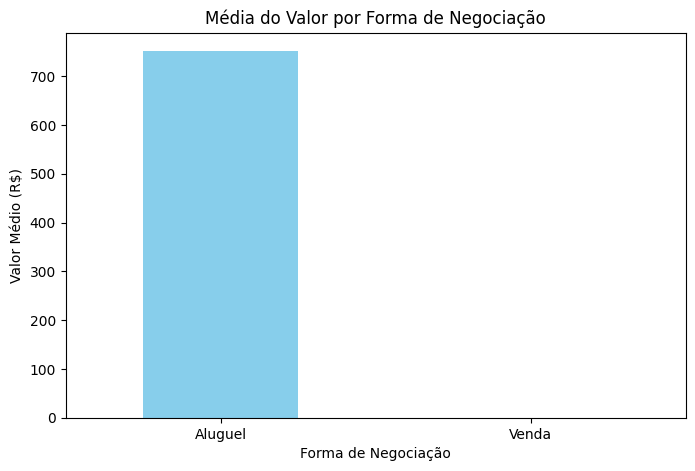

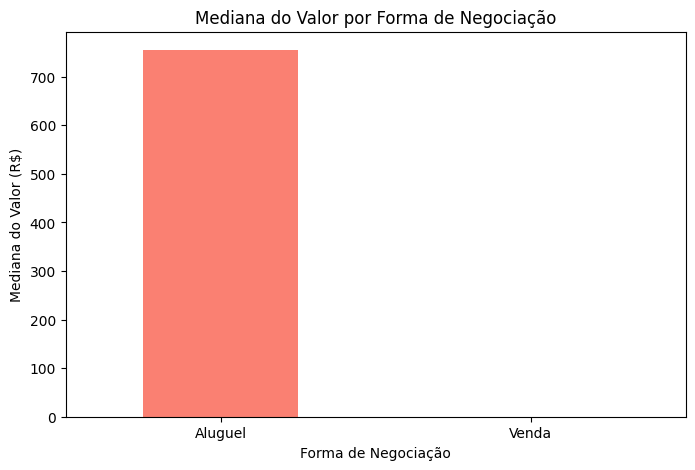

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Já deve estar importado

# Certifique-se que a coluna 'VALOR (Em Reais)' está tratada e numérica
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)

# Agrupa o DataFrame pela coluna 'FORMA' e calcula as estatísticas descritivas para a coluna 'VALOR'
estatisticas_por_forma = df.groupby('FORMA')['VALOR (Em Reais)'].describe()

# Exemplo: Gráfico de barras para a Média do Valor por Forma
plt.figure(figsize=(8, 5))
estatisticas_por_forma['mean'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Média do Valor por Forma de Negociação')
plt.xlabel('Forma de Negociação')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=0) # Para não girar os rótulos do eixo x
plt.show()

# Exemplo: Gráfico de barras para a Mediana do Valor por Forma
plt.figure(figsize=(8, 5))
estatisticas_por_forma['50%'].plot(kind='bar', color=['salmon', 'orange'])
plt.title('Mediana do Valor por Forma de Negociação')
plt.xlabel('Forma de Negociação')
plt.ylabel('Mediana do Valor (R$)')
plt.xticks(rotation=0)
plt.show()

Estatísticas Descritivas para a coluna VALOR - SOMENTE VENDA:
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: VALOR (Em Reais), dtype: float64


<Figure size 1000x600 with 0 Axes>

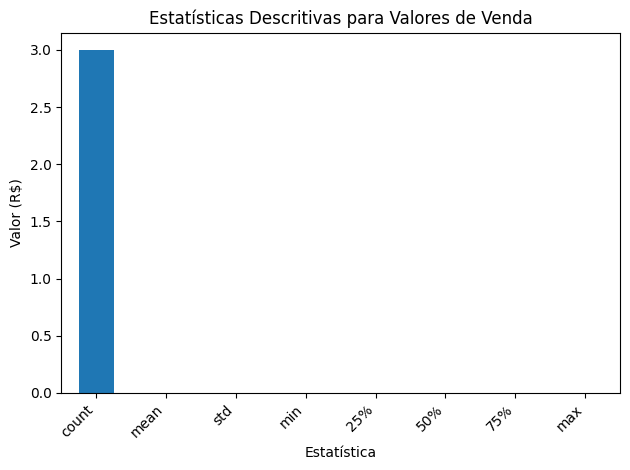

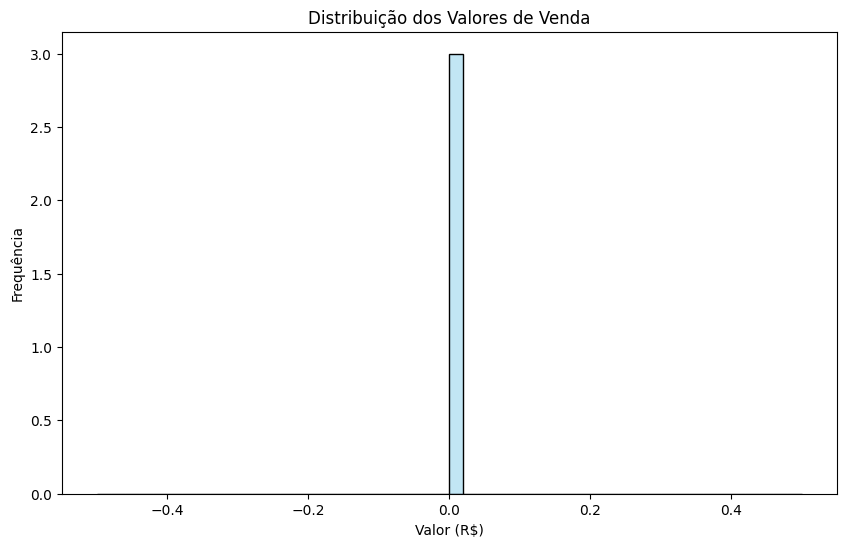

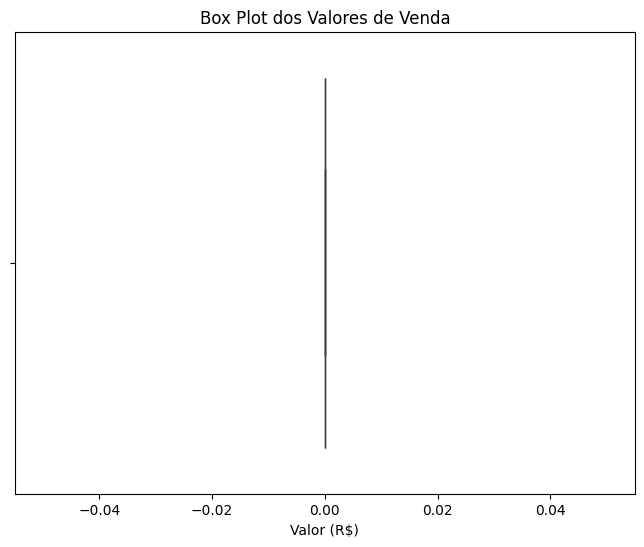

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Já deve estar importado

# Certifique-se que a coluna 'VALOR (Em Reais)' está tratada e numérica
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)

# --- NOVO PASSO: Filtrar apenas dados de VENDA ---
# Verifique a capitalização exata da palavra 'Venda' na sua coluna 'FORMA'
df_venda = df[df['FORMA'] == 'Venda'].copy() # Use .copy() para evitar SettingWithCopyWarning

# Verifica se há registros de venda após a filtragem
if not df_venda.empty:
    # Calcula as estatísticas descritivas SOMENTE para os dados de VENDA
    estatisticas_venda = df_venda['VALOR (Em Reais)'].describe()

    print("Estatísticas Descritivas para a coluna VALOR - SOMENTE VENDA:")
    print(estatisticas_venda)

    # --- Gerar gráficos usando APENAS o DataFrame df_venda ---

    # Exemplo: Gráfico de barras para as estatísticas descritivas de VENDA
    # Transforme as estatísticas em um DataFrame para plotar
    estatisticas_venda_df = estatisticas_venda.to_frame(name='Valor')

    plt.figure(figsize=(10, 6))
    estatisticas_venda_df.plot(kind='bar', legend=False)
    plt.title('Estatísticas Descritivas para Valores de Venda')
    plt.xlabel('Estatística')
    plt.ylabel('Valor (R$)')
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos para melhor visualização
    plt.tight_layout() # Ajusta o layout
    plt.show()

    # Exemplo: Histograma dos valores de VENDA
    plt.figure(figsize=(10, 6))
    sns.histplot(df_venda['VALOR (Em Reais)'], bins=50, kde=True, color='skyblue')
    plt.title('Distribuição dos Valores de Venda')
    plt.xlabel('Valor (R$)')
    plt.ylabel('Frequência')
    plt.show()

    # Exemplo: Box Plot dos valores de VENDA
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_venda['VALOR (Em Reais)'])
    plt.title('Box Plot dos Valores de Venda')
    plt.xlabel('Valor (R$)')
    plt.show()

else:
    print("Nenhum registro de 'Venda' encontrado na coluna 'FORMA'. Verifique a capitalização ou o conteúdo da coluna.")

Estatísticas para a coluna VALOR - SOMENTE ALUGUEL:
Média do valor para aluguel: 751.54
Mediana do valor para aluguel: 755.00
Moda do valor para aluguel:
0    800.0
Name: VALOR (Em Reais), dtype: float64


/tmp/ipython-input-50316101.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estatística', y='Valor', data=df_plot, palette='viridis')


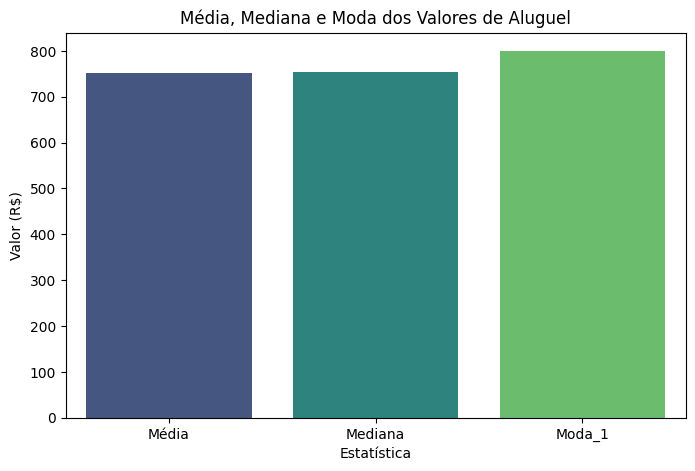

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Já deve estar importado

# Certifique-se que a coluna 'VALOR (Em Reais)' está tratada e numérica
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)

# --- NOVO PASSO: Filtrar apenas dados de ALUGUEL ---
# Verifique a capitalização exata da palavra 'Aluguel' na sua coluna 'FORMA'
df_aluguel = df[df['FORMA'] == 'Aluguel'].copy() # Use .copy() para evitar SettingWithCopyWarning

# Verifica se há registros de aluguel após a filtragem
if not df_aluguel.empty:
    # Calcula a média do valor SOMENTE para os dados de ALUGUEL
    media_valor_aluguel = df_aluguel['VALOR (Em Reais)'].mean()

    # Calcula a mediana do valor SOMENTE para os dados de ALUGUEL
    mediana_valor_aluguel = df_aluguel['VALOR (Em Reais)'].median()

    # Calcula a moda do valor SOMENTE para os dados de ALUGUEL
    moda_valor_aluguel = df_aluguel['VALOR (Em Reais)'].mode()

    # Exibe os resultados numéricos
    print("Estatísticas para a coluna VALOR - SOMENTE ALUGUEL:")
    print(f"Média do valor para aluguel: {media_valor_aluguel:.2f}")
    print(f"Mediana do valor para aluguel: {mediana_valor_aluguel:.2f}")
    print(f"Moda do valor para aluguel:")
    print(moda_valor_aluguel)

    # --- Gerar gráfico para Média, Mediana e Moda de Aluguel ---
    # É um pouco tricky colocar média, mediana e moda em um único gráfico de barras simples
    # Vamos criar um DataFrame pequeno para visualizá-los juntos

    # Prepare os dados para o gráfico
    estatisticas_para_plotar = {
        'Estatística': ['Média', 'Mediana'] + [f'Moda_{i+1}' for i in range(len(moda_valor_aluguel))],
        'Valor': [media_valor_aluguel, mediana_valor_aluguel] + moda_valor_aluguel.tolist()
    }
    df_plot = pd.DataFrame(estatisticas_para_plotar)


    plt.figure(figsize=(8, 5))
    sns.barplot(x='Estatística', y='Valor', data=df_plot, palette='viridis')
    plt.title('Média, Mediana e Moda dos Valores de Aluguel')
    plt.xlabel('Estatística')
    plt.ylabel('Valor (R$)')
    plt.show()


else:
    print("Nenhum registro de 'Aluguel' encontrado na coluna 'FORMA'. Verifique a capitalização ou o conteúdo da coluna.")


In [13]:
# Certifique-se que a coluna 'VALOR (Em Reais)' está tratada e numérica
# (Você já tem este código em seu notebook)
df['VALOR (Em Reais)'] = pd.to_numeric(df['VALOR (Em Reais)'].astype(str).str.replace('[^0-9.,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')
df.dropna(subset=['VALOR (Em Reais)'], inplace=True)

# Define o valor que você quer procurar
valor_procurado = 800.00 # Use o valor com o mesmo tipo (float) da coluna

# Filtra o DataFrame para encontrar imóveis com o valor exato
imoveis_valor_800 = df[df['VALOR (Em Reais)'] == valor_procurado]

# Verifica se algum imóvel foi encontrado
if not imoveis_valor_800.empty:
    # Exibe os imóveis encontrados
    print(f"Imóveis com o valor exato de R$ {valor_procurado:.2f}:")
    print(imoveis_valor_800)
else:
    print(f"Nenhum imóvel encontrado com o valor exato de R$ {valor_procurado:.2f}.")

Imóveis com o valor exato de R$ 800.00:
       FORMA                     MODELO  VALOR (Em Reais)             BAIRRO  \
670  Aluguel  apartamento 2 dormitórios             800.0  Parque Industrial   
674  Aluguel  apartamento 2 dormitórios             800.0       Jardim Souto   
678  Aluguel  apartamento 2 dormitórios             800.0   Jardim São Dimas   
725  Aluguel                      casas             800.0     Vila São Bento   
737  Aluguel                 comerciais             800.0             Centro   

      REGIÃO  IMOBILIARIA  
670      Sul        Elite  
674  Sudeste     Piramide  
678  Central  Vasconcelos  
725      Sul       Kogake  
737  Central     Piramide  
